In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


# Prepare Data

In [2]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Standardize

In [7]:
x = np.array(data['data'])
x = (x - np.mean(x))/np.std(x) # standardize
y = data['target']
species_lb = LabelBinarizer()
_y = species_lb.fit_transform(y) # One hot
print('x : \n', x[:5], '\ny : \n', y[:5])

x : 
 [[ 0.82858665  0.01798522 -1.04592915 -1.65388022]
 [ 0.72726147 -0.23532773 -1.04592915 -1.65388022]
 [ 0.62593629 -0.13400255 -1.09659174 -1.65388022]
 [ 0.5752737  -0.18466514 -0.99526657 -1.65388022]
 [ 0.77792406  0.06864781 -1.04592915 -1.65388022]] 
y : 
 [0 0 0 0 0]


Generate noise

In [8]:
mu, sigma = 0, 1
np.random.seed(0)
s = 16 * 150
noise = np.random.normal(mu, sigma, s)
noise = noise.reshape(150, 16)
noise[0]

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433])

In [9]:
x = np.append(x, noise, axis = 1)
x[0]

array([ 0.82858665,  0.01798522, -1.04592915, -1.65388022,  1.76405235,
        0.40015721,  0.97873798,  2.2408932 ,  1.86755799, -0.97727788,
        0.95008842, -0.15135721, -0.10321885,  0.4105985 ,  0.14404357,
        1.45427351,  0.76103773,  0.12167502,  0.44386323,  0.33367433])

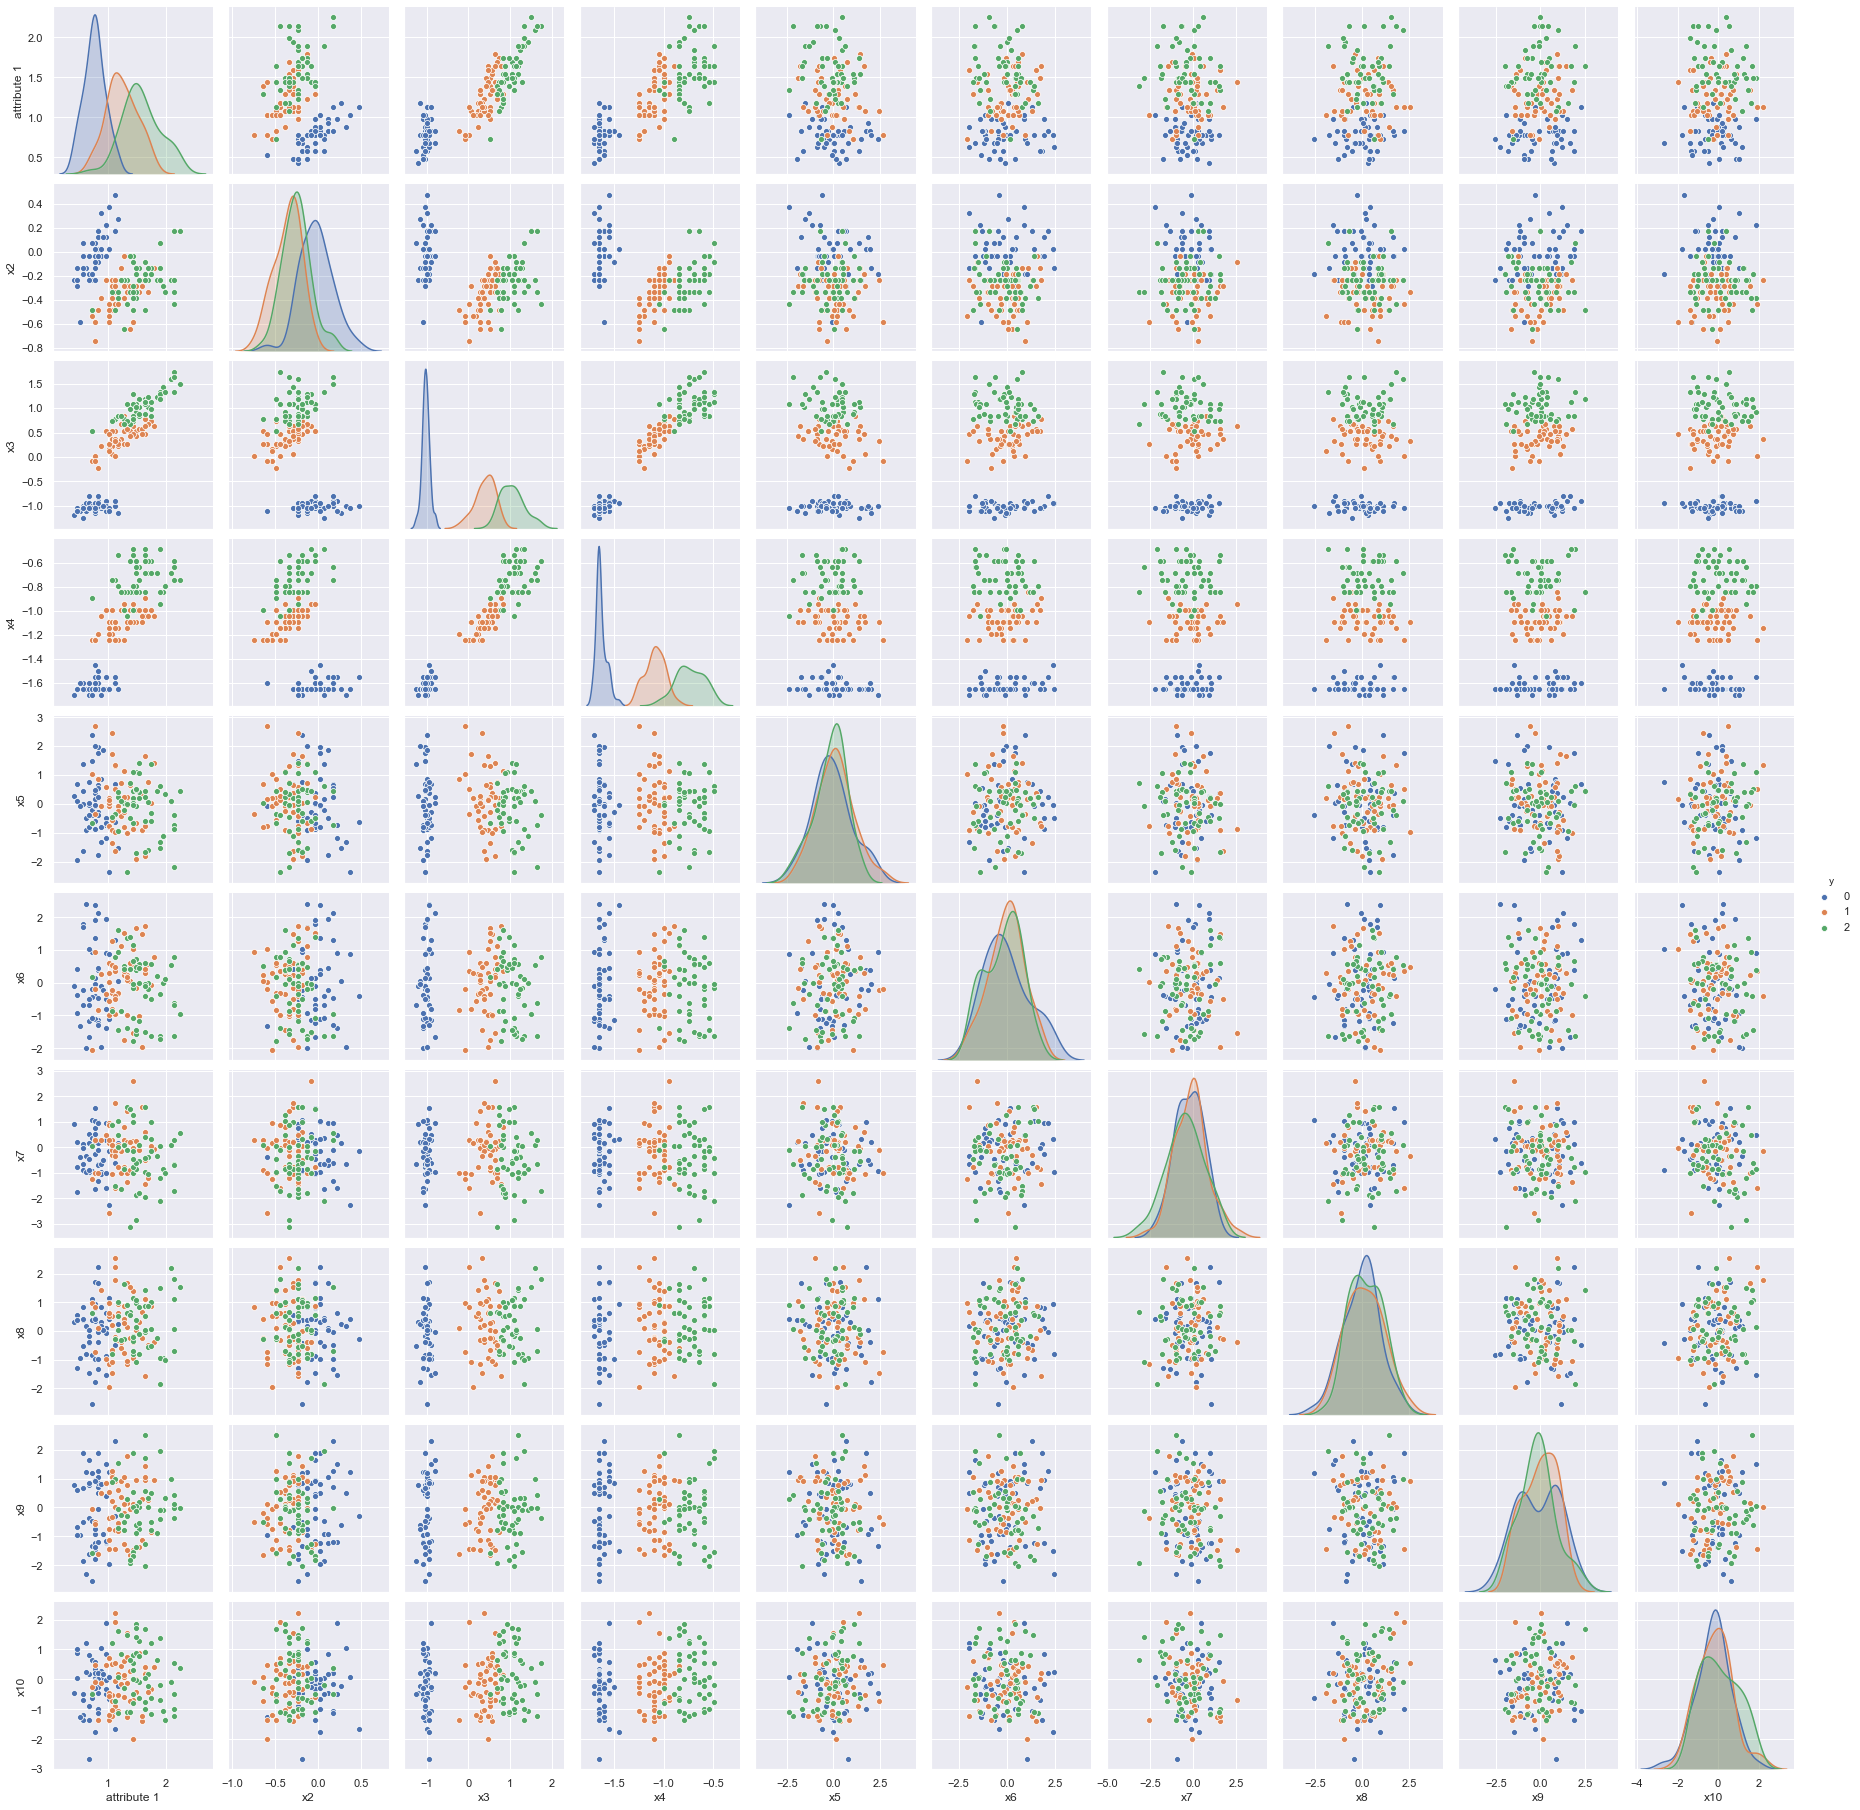

In [10]:
_data = pd.DataFrame({'attribute 1' : x[:, 0],
                        'x2' : x[:, 1],
                        'x3' : x[:, 2],
                        'x4' : x[:, 3],
                        'x5' : x[:, 4],
                        'x6' : x[:, 5],
                        'x7' : x[:, 6],
                        'x8' : x[:, 7],
                        'x9' : x[:, 8],
                        'x10': x[:, 9],
                        'y'  : y})
sns.pairplot(_data, hue="y")

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, _y, test_size=0.1, random_state=1)
X_train.shape

(135, 20)

# Neural Network

In [18]:
# Parameters
learning_rate = 0.01
training_epochs = 150

# Neural Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 128 # 1st layer number of neurons
n_input = X_train.shape[1] # input shape (105, 4)
n_classes = y_train.shape[1] # classes to predict

# Inputs
X = tf.placeholder("float", shape=[None, n_input])
y = tf.placeholder("float", shape=[None, n_classes])

# Dictionary of Weights and Biases
weights = {
  'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
  'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
  'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
  'b1': tf.Variable(tf.random_normal([n_hidden_1])),
  'b2': tf.Variable(tf.random_normal([n_hidden_2])),
  'out': tf.Variable(tf.random_normal([n_classes]))
}

Forward Propagation

In [19]:
# Model Forward Propagation step
def forward_propagation(x):
    # Hidden layer1
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output fully connected layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out'] 
    return out_layer
# Model Outputs
yhat = forward_propagation(X)
ypredict = tf.argmax(yhat, axis=1)

Backward Propagation

In [20]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=yhat))
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(cost)

Train

In [21]:
# Initializing the variables
init = tf.global_variables_initializer()
from datetime import datetime
startTime = datetime.now()
with tf.Session() as sess:
    sess.run(init)
    
    #writer.add_graph(sess.graph)
    #EPOCHS
    for epoch in range(training_epochs):
        #Stochasting Gradient Descent
        for i in range(len(X_train)):
            summary = sess.run(train_op, feed_dict={X: X_train[i: i + 1], y: y_train[i: i + 1]})
        
        train_accuracy = np.mean(np.argmax(y_train, axis=1) == sess.run(ypredict, feed_dict={X: X_train, y: y_train}))
        test_accuracy  = np.mean(np.argmax(y_test, axis=1) == sess.run(ypredict, feed_dict={X: X_test, y: y_test}))
                
        print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%" % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))
        #print("Epoch = %d, train accuracy = %.2f%%" % (epoch + 1, 100. * train_accuracy))
    sess.close()
print("Time taken:", datetime.now() - startTime)

Epoch = 1, train accuracy = 77.78%, test accuracy = 73.33%
Epoch = 2, train accuracy = 91.85%, test accuracy = 60.00%
Epoch = 3, train accuracy = 90.37%, test accuracy = 66.67%
Epoch = 4, train accuracy = 95.56%, test accuracy = 80.00%
Epoch = 5, train accuracy = 96.30%, test accuracy = 86.67%
Epoch = 6, train accuracy = 94.81%, test accuracy = 80.00%
Epoch = 7, train accuracy = 95.56%, test accuracy = 80.00%
Epoch = 8, train accuracy = 97.04%, test accuracy = 80.00%
Epoch = 9, train accuracy = 97.04%, test accuracy = 80.00%
Epoch = 10, train accuracy = 97.04%, test accuracy = 80.00%
Epoch = 11, train accuracy = 97.04%, test accuracy = 80.00%
Epoch = 12, train accuracy = 97.04%, test accuracy = 80.00%
Epoch = 13, train accuracy = 97.04%, test accuracy = 80.00%
Epoch = 14, train accuracy = 97.04%, test accuracy = 80.00%
Epoch = 15, train accuracy = 97.04%, test accuracy = 80.00%
Epoch = 16, train accuracy = 97.04%, test accuracy = 80.00%
Epoch = 17, train accuracy = 97.04%, test accurac